#### Dissertation Code Appendix

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Install geopy
import sys
!{sys.executable} -m pip install geopy

# Import geodesic to calculate distance
import geopy
from geopy.distance import geodesic

# Import folium
import sys
!{sys.executable} -m pip install folium

import folium

In [2]:
virus1=pd.read_excel('Data for enteric virus MSc.xlsx')
virus1['location']=list(zip(virus1.LATITUDE,virus1.LONGITUDE))

#virus11=virus1.loc[virus1.is_coinf>0]
virus11=virus1.copy()
virus11['common_num']=(virus11.Rotavirus==1).astype(int)+(virus11.Norovirus==1).astype(int)+(virus11.Sapovirus==1).astype(int)+(virus11.Kobuvirus==1).astype(int)+(virus11.Mastadenovirus==1).astype(int)+(virus11.Mamastrovirus==1).astype(int)
virus11['uncommon_num']=virus11.is_coinf-virus11.common_num

location=virus11.groupby('location')
plot_common=pd.DataFrame(location['common_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
# Column 'radius' is used for drawing radius
plot_common['radius']=plot_common['count'].apply(lambda x:x/2)

plot_uncommon=pd.DataFrame(location['uncommon_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
# Column 'radius' is used for drawing radius
plot_uncommon['radius']=plot_uncommon['count'].apply(lambda x:x/2)

##### Whole Vietnam 

In [3]:
import folium

m = folium.Map(
    location=[10.47068691, 105.6360626],
    zoom_start=6
)

for i in range(0,len(plot_common)):
    folium.CircleMarker(location=list(plot_common['location'][i]),
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        radius=int(plot_common['radius'][i])).add_to(m)

    
for i in range(0,len(plot_uncommon)):
    folium.CircleMarker(location=list(plot_uncommon['location'][i]),
                        color='red',
                        fill=True,
                        fill_color='red',
                        radius=int(plot_uncommon['radius'][i])).add_to(m)    
    
    
    
m

#### Whole Vietnam * 0.1 Centrally City

In [4]:
summary_common=pd.DataFrame(virus11.groupby('CentrallyCity')['common_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
summary_common['location']=([10.47068691,105.6360626],[13.14076042,108.4307022],[12.16952991,109.313591],[16.78855324,107.1891403],[12.39900494,107.8738861],[16.56599617,107.3940201],[17.52080917,106.5937042])

summary_uncommon=pd.DataFrame(virus11.groupby('CentrallyCity')['uncommon_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
summary_uncommon['location']=([10.47068691,105.6360626],[13.14076042,108.4307022],[12.16952991,109.313591],[16.56599617,107.3940201],[16.78855324,107.1891403],[17.52080917,106.5937042],[12.39900494,107.8738861])


In [5]:
import folium

m = folium.Map(
    location=[10.47068691, 105.6360626],
    zoom_start=6
)

for i in range(0,len(summary_common)):
    folium.CircleMarker(location=list(summary_common['location'][i]),
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        radius=int(summary_common['count'][i])/10).add_to(m)

    
for i in range(0,len(summary_uncommon)):
    folium.CircleMarker(location=list(summary_uncommon['location'][i]),
                        color='red',
                        fill=True,
                        fill_color='red',
                        radius=int(summary_uncommon['count'][i])/10).add_to(m)   

    
m

In [6]:
# Common virus number 
summary_common

,CentrallyCity,count,location
0,Dong Thap,337,"(10.47068691, 105.6360626)"
1,Dak Lak,17,"(13.14076042, 108.4307022)"
2,Khanh Hoa,10,"(12.16952991, 109.313591)"
3,Quang Tri,5,"(16.78855324, 107.1891403)"
4,Dak Nong,4,"(12.39900494, 107.8738861)"
5,Thua Thien - Hue,1,"(16.56599617, 107.3940201)"
6,Quang Binh,1,"(17.52080917, 106.5937042)"


In [7]:
# Uncommon virus number 
summary_uncommon 

,CentrallyCity,count,location
0,Dong Thap,317.0,"(10.47068691, 105.6360626)"
1,Dak Lak,10.0,"(13.14076042, 108.4307022)"
2,Khanh Hoa,9.0,"(12.16952991, 109.313591)"
3,Thua Thien - Hue,3.0,"(16.56599617, 107.3940201)"
4,Quang Tri,1.0,"(16.78855324, 107.1891403)"
5,Quang Binh,1.0,"(17.52080917, 106.5937042)"
6,Dak Nong,1.0,"(12.39900494, 107.8738861)"


#### Dong Thap

In [8]:
virus1=pd.read_excel('Data for enteric virus MSc.xlsx')
virus1['location']=list(zip(virus1.LATITUDE,virus1.LONGITUDE))

#virus11=virus1.loc[virus1.is_coinf>0]
virus11=virus1.copy().loc[virus1.CentrallyCity=='Dong Thap']
virus11['common_num']=(virus11.Rotavirus==1).astype(int)+(virus11.Norovirus==1).astype(int)+(virus11.Sapovirus==1).astype(int)+(virus11.Kobuvirus==1).astype(int)+(virus11.Mastadenovirus==1).astype(int)+(virus11.Mamastrovirus==1).astype(int)
virus11['uncommon_num']=virus11.is_coinf-virus11.common_num

location=virus11.groupby('location')
plot_common=pd.DataFrame(location['common_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
# Column 'radius' is used for drawing radius
plot_common['radius']=plot_common['count'].apply(lambda x:x/2)

plot_uncommon=pd.DataFrame(location['uncommon_num'].sum().sort_values(ascending=False).reset_index(name = "count"))
# Column 'radius' is used for drawing radius
plot_uncommon['radius']=plot_uncommon['count'].apply(lambda x:x/2)

In [9]:
import folium

m = folium.Map(
    location=[10.47068691, 105.6360626],
    zoom_start=10
)

for i in range(0,len(plot_common)):
    folium.CircleMarker(location=list(plot_common['location'][i]),
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        radius=int(plot_common['radius'][i])).add_to(m)

    
for i in range(0,len(plot_uncommon)):
    folium.CircleMarker(location=list(plot_uncommon['location'][i]),
                        color='red',
                        fill=True,
                        fill_color='red',
                        radius=int(plot_uncommon['radius'][i])).add_to(m)    
    
m

#### Other Rigions * 2

In [10]:
import folium

m = folium.Map(
    location=[13.14076042, 108.4307022],
    zoom_start=6
)

for i in range(1,len(summary_common)):
    folium.CircleMarker(location=list(summary_common['location'][i]),
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        radius=int(summary_common['count'][i])*2).add_to(m)

    
for i in range(1,len(summary_uncommon)):
    folium.CircleMarker(location=list(summary_uncommon['location'][i]),
                        color='red',
                        fill=True,
                        fill_color='red',
                        radius=int(summary_uncommon['count'][i])*2).add_to(m)   

    
m

## Risk Factors

### Exploratory Data Analysis and Preprocessing
#### Feature selection by meaning (repetitive and irrespective features)
1. Sample ID and PatientNo : Do no infect our results as individual ID.
2. DOB_Year : We choose Age as our feature,it holds same meaning with 'date of birth'
3. Date of hospital entry/ Admindate/ Dateonset all tell us about the initial time of enteric disease, and we only use DateOnset
4. We can use the Lenth of Stay as a factor to describe severity, therefore, with DateOnset, it is feasible to get ending date information (DateOnset+Length= DateDischOrDeath)and do not need DateDischOrDeath 
5. DateOnset also contains information about the Year of enrollment, and give us a more detailed time information. 
6. I would like to use SiteRecruitment as a location feature, so drop other address information CentrallyCity, ProvincialCity,Longtitude and Latitude. 
7. As discription, Real-time PCR results(Not available) is not discussed here, so drop AP-BC columns. 


In [11]:
len(pd.Series(np.unique(virus1['Sample ID'])))

707

In [12]:
virus2=virus1.drop(columns=['Sample ID','PatientNo','DOB_Year','Date of hospital entry','AdminDate','DateDischOrDeath','Year of enrollment','CentrallyCity','ProvincialCity','LONGITUDE','LATITUDE','Rotavirus.PCR.','Ct.value','Ct.value.1','Ct.value.2','Ct.value.3','Ct.value.4','Ct.value.5','Ct.value.6','Norovirus2.PCR.','Norovirus1.PCR.','Aichivirus.PCR.','Adenovirus.PCR.','Sapovirus.PCR.','Astrovirus.PCR.'])

#### Incomplete features imputation 
Some features contains `NAN` values, if there are only a few missings, we just delete them and use complete dateset. However, if its missings are a lot which can also give use information, I would like to use imputation to deal with it.  

1. Find incomplete features
From belowing table, we can find there are some features with missing values 


`NumberDiarEpi`: There are 21 missings here, and I would like to imputate it 

In [13]:
missing_table=virus2.isnull().sum()
missing_table.loc[missing_table>0]

NumberDiarEpi         21
HaemoglobinResult      1
WhiteCellsResult       1
NeutrophilsResult      1
LymphocytesResult      1
EosinophilsResult     12
PlateletsResult        2
KnownTemp            367
Temp                 426
is_coinf             267
dtype: int64

`HaemoglobinResult`:There is only one missing, and decide to drop it, and we can find in the table that this patient did not have WhiteCellsResult,NeutrophilsResult,LymphocytesResult and PlateletsResult either. 

In [14]:
virus22=virus2.loc[~virus2.HaemoglobinResult.isnull()]
#missing_table=virus22.isnull().sum()
missing_table=virus22.isnull().sum()
missing_table.loc[missing_table>0]

NumberDiarEpi         21
EosinophilsResult     11
PlateletsResult        1
KnownTemp            367
Temp                 426
is_coinf             267
dtype: int64

`PlateletsResult`: Only one missing,let us observe it. We can find its other features are complete, so I decide to use Platelets median to do its imputation.

In [15]:
patient_686=virus22.loc[virus22.PlateletsResult.isnull()]
patient_686

,Age,SiteRecruitment,Gender,DateOnset,Length of stay,ContactDiar,BloodStool,MucoidStool,NumberDiarEpi,AbdominalPain,...,Picobirnavirus,Porprismacovirus,Protoparvovirus,Rotavirus,Rubulavirus,Salivirus,Sapovirus,Unclassified virus,is_coinf,location
686,1,2,2,2013-11-23,3,2,2,2,5.0,2,...,2,2,2,2,2,2,1,2,2.0,"(12.25095367, 107.6954803)"


In [16]:
virus22.loc[virus22.PlateletsResult.isnull(),'PlateletsResult']=virus22['PlateletsResult'].median()
missing_table=virus22.isnull().sum()
missing_table.loc[missing_table>0]

C:\Drivers\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


NumberDiarEpi         21
EosinophilsResult     11
KnownTemp            367
Temp                 426
is_coinf             267
dtype: int64

`is_coinf`: There are 267 missings include 0(0 virus included) or missing. In order to find the complete accurate values, I directly count how many specific viruses are tested positive and use it as `is_conf`. And I check the difference actual number calculated and NA is 0, which means all the NA are 0. 

In [17]:
#sum(np.abs(virus22.loc[:,'Alphapapillomavirus':'Unclassified virus']-2).apply(lambda x: x.sum(), axis=1)-virus22.is_coinf)
virus22.loc[:,'is_coinf']=list(np.abs(virus22.loc[:,'Alphapapillomavirus':'Unclassified virus']-2).apply(lambda x: x.sum(),axis=1))
missing_table=virus22.isnull().sum()
missing_table.loc[missing_table>0]

NumberDiarEpi         21
EosinophilsResult     11
KnownTemp            367
Temp                 426
dtype: int64

`NumberDiarEpi` and `EosinophilsResult`: I would like to use linear regression model to find the predicted values for these two features. All the models are based on complete dataset. If we can predict well, it's feasible to use predictions to imputate. 

In linear regression model, it does not include any 'Timestamp' information, therefore drop this feature.

And I also transform all the `Watersource` information from TRUE/FALSE to 1/0.

There could be `NAN` in `KnownTemp`,`Temp` when we do the linear regression and its prediction. Firstly, try dataset with complete temperature, it's fitness is quite close to model without temperature. So, I delete for better prediction.

NOTICE: Since the missing percentages for these two features are very small with 21/11 missing values, I would directly use linear regression results although model fit is not that perfect. 



In [18]:
virus23=virus22.dropna(axis = 0)
virus23=virus23.drop(columns=['DateOnset','KnownTemp','Temp','location'])
virus23.loc[:,'Tap':'OtherWS']=virus23.loc[:,'Tap':'OtherWS'].astype(int)

from sklearn.linear_model import LinearRegression
x=virus23.drop('NumberDiarEpi',axis=1)
y=virus23.NumberDiarEpi
l1= LinearRegression().fit(x, y)

def get_lr_stats(x, y, model):
    from scipy import stats
    n     = len(x)
    y_prd = model.predict(x)
    Regression = sum((y_prd - np.mean(y))**2) 
    Residual   = sum((y - y_prd)**2)          
    R_square   = Regression / (Regression + Residual) 
    F          = (Regression / 1) / (Residual / ( n - 2 ))
    pf         = stats.f.sf(F, 1, n-2)
    
    L_xx  =  n * np.var(x)
    sigma =  np.sqrt(Residual / n) 
    t     =  model.coef_ * np.sqrt(L_xx) / sigma
    pt    =  stats.t.sf(t, n-2)
    return (R_square)

print(get_lr_stats(x,y,l1))

0.23193684766659559


$$R^2=\frac{\sum_i{(\hat{y_i}-\bar{y_i})^2}}{\sum_i{(\hat{y_i}-\bar{y_i})^2}+\sum_i{(y_i-\bar{y_i})^2}}$$

In [19]:
from sklearn.linear_model import LinearRegression
x=virus23.drop('EosinophilsResult',axis=1)
y=virus23.EosinophilsResult
l2= LinearRegression().fit(x, y)

print(get_lr_stats(x,y,l2))

0.4917514149127706


##### Imputation Linear Regression model. 

NumberDiarEpi Linear prediction

In [20]:
virus33=virus22.copy().drop(columns='location')

In [21]:
x_pre_NumberDiarEpi=virus33.loc[virus33.NumberDiarEpi.isnull(),:].drop(columns=['NumberDiarEpi','DateOnset','KnownTemp','Temp'])
index1=x_pre_NumberDiarEpi.index
linear_imputation_nde=l1.predict(x_pre_NumberDiarEpi)
j=0
for i in index1:
    virus33.loc[i,'NumberDiarEpi']=round(linear_imputation_nde[j])
    j=j+1

In [22]:
missing_table=virus33.isnull().sum()
missing_table.loc[missing_table>0]

EosinophilsResult     11
KnownTemp            367
Temp                 426
dtype: int64

EosinophilsResult Linear prediction

In [23]:
x_pre_EosinophilsResult=virus33.loc[virus33.EosinophilsResult.isnull(),:].drop(columns=['EosinophilsResult','DateOnset','KnownTemp','Temp'])
index2=x_pre_EosinophilsResult.index
linear_imputation_ER=l2.predict(x_pre_EosinophilsResult)
j=0
for i in index2:
    virus33.loc[i,'EosinophilsResult']=round(linear_imputation_ER[j])
    j=j+1


In [24]:
missing_table=virus33.isnull().sum()
missing_table.loc[missing_table>0]

KnownTemp    367
Temp         426
dtype: int64

#####  Temperature model selection:

`Temperature` is a quite special feature with a large amount of missing.Therefore, I would like to regard `known/not known` as another feature compared with patients temperature. And if we known it, `KnownTemp` should be 1, otherwise it's 0. 

Towards those unknown temperature, I would like to use different kinds of model to do predictions and find the best temperature-imputation model here. 

In [25]:
virus33.loc[virus33.KnownTemp.isnull(),'KnownTemp']=0

In [26]:
missing_table=virus33.isnull().sum()
missing_table.loc[missing_table>0]

Temp    426
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
virus44=virus33.dropna()
x=virus44.drop(columns=['Temp','DateOnset'],axis=1)
y=virus44.Temp
x_t,x_te,y_t,y_te = train_test_split(x,y,test_size=0.2,random_state=1234)

from sklearn.linear_model import LinearRegression
lm= LinearRegression().fit(x_t, y_t)
yhat=lm.predict(x_te)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_te, yhat)

0.543220812980382

In [28]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler().fit(x)
xt_s=S.transform(x_t)
xte_s=S.transform(x_te)
x_s=S.transform(x)

In [29]:
lm_s= LinearRegression().fit(xte_s, y_te)
yhat=lm_s.predict(xte_s)
mean_squared_error(y_te, yhat)

0.11752948356365199

In [30]:
virus44.loc[:,'Tap':'OtherWS']=virus44.loc[:,'Tap':'OtherWS'].astype(int)
x=virus44.drop(columns=['Temp','DateOnset'],axis=1)
y=virus44.Temp
x_t,x_te,y_t,y_te = train_test_split(x,y,test_size=0.2,random_state=1111)


# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
            'max_depth': range(1,10), 
            'n_estimators': (100,500), 
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1).fit(x_t,y_t)

best_params = gsc.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=1111).fit(x_t,y_t)

yhat=rfr.predict(x_te)

mean_squared_error(y_te, yhat)

C:\Drivers\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Drivers\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.3545959308099827

#### Additional information: 
1. Missing values have higher probabilities without fever
2. In general, temperature for hunman is in 36-41.

In [31]:
x_pre_Temp=virus33.loc[virus33.Temp.isnull(),:].drop(columns=['Temp','DateOnset'])
index3=x_pre_Temp.index
x_pre_Temp=S.transform(x_pre_Temp)
imputation_temp=lm_s.predict(x_pre_Temp)
virus34=virus33.copy()
for i in range(0,len(imputation_temp)):
    if imputation_temp[i]<36:
        imputation_temp[i]=36.5
    else:
        if imputation_temp[i]>41:
            imputation_temp[i]=40.5
            
j=0
for i in index3:
    virus34.loc[i,'Temp']=imputation_temp[j]
    j=j+1

In [32]:
missing_table=virus34.isnull().sum()
missing_table.loc[missing_table>0]

Series([], dtype: int64)

Text(0.5, 1.0, 'Known temperature distribution')

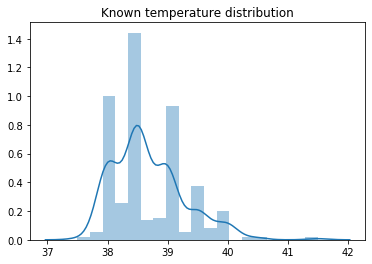

In [63]:
import seaborn as sns
known=virus34.loc[(virus34.KnownTemp==1)==True].Temp.values
sns.distplot(known).set_title("Known temperature distribution")

Text(0.5, 1.0, 'Predicted temperature distribution')

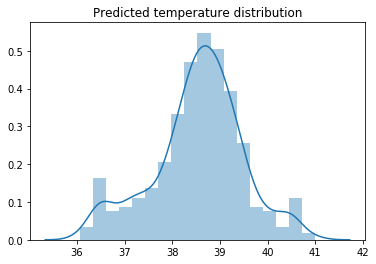

In [34]:
sns.distplot(imputation_temp).set_title("Predicted temperature distribution")

#### Other unknown features 

Not like features we discussed above which contain NA in dataset,`ContactDiar`,`BloodinStool`,`MucoidStool`,`Abdominal pain`,`ThreeDaysFever` use number 9 to represent 'unknown'(1 is yes; 2 is no). To deal with those features, firstly show missing dataset. 

`ContactDiar` indicates Whether or not patient had contacted other diarrhea patients, and `BloodStool`,`MucoidStool` represent medical tools. From their meanings, I think of the feature `SiteRecruitment` which shows address here. In other words, the patients in same area probably held same medical condition and population. So I would use the mean value of these three features in the same site to do the imputation.   

`ThreeDaysFever`,`Abdominal Pain` I would like to use similar method imputating by different Sites like other features.

And we will finish all the incomplete imputation here. 

In [35]:
virus34.loc[((virus34.BloodStool==9)|(virus34.MucoidStool==9))|(virus34['AbdominalPain']==9)|(virus34.ThreeDaysFever==9)].loc[:,['SiteRecruitment','ContactDiar','BloodStool','MucoidStool','AbdominalPain','ThreeDaysFever']]

,SiteRecruitment,ContactDiar,BloodStool,MucoidStool,AbdominalPain,ThreeDaysFever
1,4,2,2,1,9,1
3,4,9,2,1,9,2
5,4,2,2,1,9,2
8,4,2,2,2,9,2
59,4,1,2,1,9,2
96,4,9,2,2,1,9
233,4,2,2,2,2,9
236,4,2,2,2,1,9
256,4,2,2,2,2,9
641,4,9,2,1,9,2


In [36]:
virus34.loc[~((virus34.BloodStool==9)|(virus34.MucoidStool==9)|(virus34['AbdominalPain']==9)|(virus34.ThreeDaysFever==9))].groupby('SiteRecruitment').mean().loc[:,'ContactDiar':'ThreeDaysFever']

,ContactDiar,BloodStool,MucoidStool,NumberDiarEpi,AbdominalPain,ThreeDaysFever
SiteRecruitment,,,,,,
2,2.388889,1.944444,1.666667,6.666667,1.833333,1.277778
4,2.016768,1.971037,1.870427,8.003049,1.556402,1.522866
5,2.000000,1.800000,1.400000,12.000000,1.400000,1.600000
6,3.166667,1.500000,1.500000,9.333333,1.666667,1.666667


We find the closest values for all features, eg(1.692308 close to 2) and finish the imputation

In [37]:
index_c=virus34.loc[(virus34.ContactDiar==9)].index
virus45=virus34.copy()

for i in index_c:
    if virus45.loc[i,'SiteRecruitment']==6:
        virus45.loc[i,'ContactDiar']=2
    else:
        virus45.loc[i,'ContactDiar']=2

index_c=virus34.loc[(virus34.BloodStool==9)].index
for i in index_c:
    if virus45.loc[i,'SiteRecruitment']==6:
        virus45.loc[i,'BloodStool']=2
    else:
        virus45.loc[i,'BloodStool']=2
        
index_c=virus34.loc[(virus34.MucoidStool==9)].index
for i in index_c:
    if virus45.loc[i,'SiteRecruitment']==5:
        virus45.loc[i,'MucoidStool']=1
    else:
        virus45.loc[i,'MucoidStool']=2


index_c=virus34.loc[(virus34.AbdominalPain==9)].index
for i in index_c:
    if virus45.loc[i,'SiteRecruitment']==5:
        virus45.loc[i,'AbdominalPain']=1
    else:
        virus45.loc[i,'AbdominalPain']=2
        
ndex_c=virus34.loc[(virus34.ThreeDaysFever==9)].index
for i in index_c:
    if virus45.loc[i,'SiteRecruitment']==1:
        virus45.loc[i,'ThreeDaysFever']=1
    else:
        virus45.loc[i,'ThreeDaysFever']=2
        


### Main Risk Factors Analysis 

In order to know the risk factors corresponding to the coinfections, I spot `is_coinf` as a categorical feature corresponding how many different viruses coinfect each patient. And our purpose is to find which features have significant impact on `is_coinf` and they can be recognized as main risk factors corresponding to the coinfections.

As for this problem, the first ideal comes to me is to use Logistic Regression Model and find coefficients for every features, and the largest absolute one should have most importance on `is_coinf`. However, I don't think bigger coefficients can accurately indicating more importance.For example, $y=5x_1+3x_2$ and $x_2$ could determine the value of $x_1$.Apparently, $x_2$ is more important than $x_1$ towards $y$ although coefficients tell opposite answer. 

After researching and trying, I decide to use `Future_importance` in `Random Forest` model to tell each feature's impact on `is_coinf`.

Firstly, we need to build a reliable and feasible categorical random forest model.`RandomForestClassifier` seems to be a good choice. And I also have two flexible parameters in this model (`n_estimators` , `max_depth`).And do additional tuning and validation for best parameters by GridSearchCV using `scoring='accuracy'`.

To test this Random Forest model,randomly split training and test dataset, one for modeling, the other for testing.And I choose 20% data as test dataset. ROC plot and AUC can help us to test this `RandomForestClassifier` we use. From the result, except single infection which are not that good with 0.48. Other coinfectons' performances are perfect. Overall, we can say this model is reliable especially for coinfection. 

Then, this `RandomForestClassifier` will give us feature importance.

In [38]:
x=virus45.drop(columns=['is_coinf','DateOnset','Length of stay','BloodStool','MucoidStool','NumberDiarEpi','AbdominalPain','ThreeDaysFever','HaemoglobinResult','WhiteCellsResult','NeutrophilsResult','LymphocytesResult','EosinophilsResult','PlateletsResult','KnownTemp','Temp',],axis=1)
y=virus45.is_coinf
# test and training dataset
x_t,x_te,y_t,y_te = train_test_split(x,y,test_size=0.2,random_state=1234)

import sklearn.ensemble 
np.random.seed(100)
max_depth=[None] + list(np.arange(1,31,5))
n_estimators=range(50,80)

m_rfcv=GridSearchCV(
    sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth),
    param_grid = {'max_depth':max_depth,'n_estimators':n_estimators},
    cv=KFold(3,False,random_state=15),
    scoring='accuracy').fit(x_t,y_t)

In [39]:
import matplotlib.pyplot as plt
def ovr_roc_plot(y_true, y_pred):
    """ Draw ROC curves using one-vs-rest approach
    """
    classes = y_true.unique()
    n_classes = len(y_true.unique())
    
    # Convert from n x 1 categorical matrix to n x k binary matrix
    y_true = sklearn.preprocessing.label_binarize(y_true, classes)
    
    # Compute ROC curve and ROC area for each class
    rocs = dict() 
    aucs = dict() 
    for name, i in zip(classes, range(n_classes)):
        aucs[i] = pd.DataFrame({ 
            'Coinfection': [name],
            'auc': [sklearn.metrics.roc_auc_score(y_true[:, i], y_pred[:, i])]
        })
        
        rocs[i] = pd.DataFrame(
            data = np.c_[sklearn.metrics.roc_curve(y_true[:, i], y_pred[:, i])],
            columns = ('fpr', 'tpr', 'threshold')
        ).assign(
            coinfection = name
        )
    
    # Bind rows to create a single data frame for each
    roc = pd.concat(rocs)
    auc = pd.concat(aucs)
    
    # Create plot
    plt.figure(figsize=(5,5))
    sns.lineplot(x='fpr', y='tpr', hue='coinfection', data=roc)

    plt.plot([0,1],[0,1], 'k--', alpha=0.5) # 0-1 line 
    plt.title("ROC ovr curves")
    plt.legend(fontsize=10)
    plt.show()
    
    # Return the AUCs as a Data Frame
    return(auc)

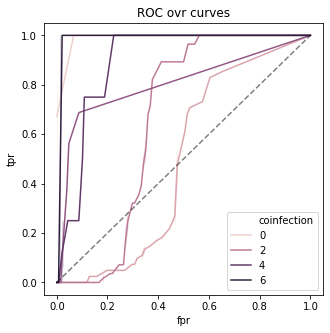

,,Coinfection,auc
0,0,0,1.000000
1,0,2,0.656485
2,0,1,0.489616
3,0,4,0.893116
4,0,5,0.985816
5,0,3,0.803819


In [40]:
pred_coinf=m_rfcv.predict_proba(x_te)
ovr_roc_plot(y_te, pred_coinf)

Put all the data into`RandomForestClassifier` to get final model.

In [41]:
np.random.seed(100)
max_depth=[None] + list(np.arange(1,31,5))
n_estimators=range(50,80)

m_rfcv=GridSearchCV(
    sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth),
    param_grid = {'max_depth':max_depth,'n_estimators':n_estimators},
    cv=KFold(3,False,random_state=15),
    scoring='accuracy').fit(x,y)

C:\Drivers\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Find $Feature Importances:entropy$ 

$VIM_{jm}^{(Gini)}=GI_m-GI_l-GI_r $


$Gini=\sum\limits_{k=1}^{K}\hat{p_{mk}}*(1-\hat{p_{mk}})$

$VIM_{ij}^{(Gini)}=\sum\limits_{m\in M}{VIM_{jm}^{(Gini)}}$

$VIM_j=\frac{VIM_j}{\sum\limits_{i=1}^{c}{VIM_i}}$

From Importances plot, Rotavirus ranks first indicating that the existence of Rotavirus has a very significant impact on the final coinfection result. And the age also have sifnificant correlation with coinfection.

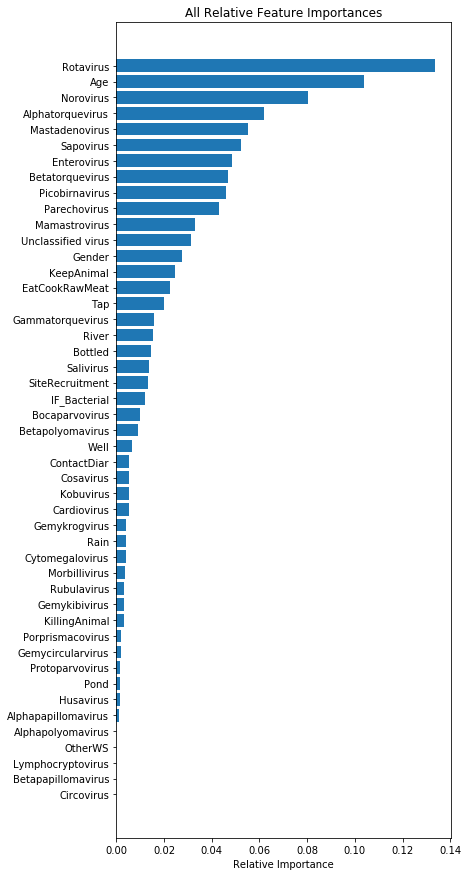

In [42]:
importances=m_rfcv.best_estimator_.feature_importances_
import matplotlib.pyplot as plt
features = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(6,15))
plt.title('All Relative Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Besides testing results and different types of virus, other features about patients including personal details(Age/gender/Site), lifestyles(Eating/Animals/Contaction/), medical conditions,health condition(Bacterials) and watersource. All these conducted as risk factors to patients.

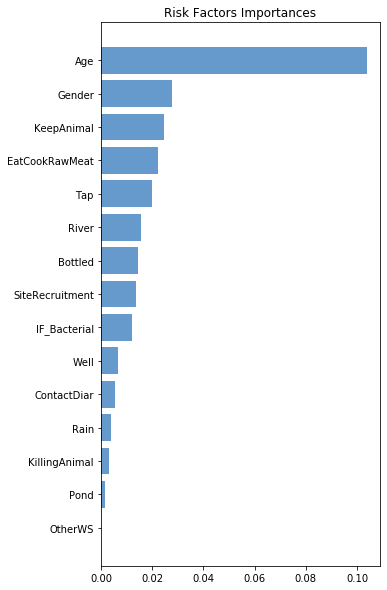

In [43]:
importances=m_rfcv.best_estimator_.feature_importances_
features=x.columns
importance_table=pd.DataFrame({'features':list(features),'importances':list(importances)})

risk_factors=importance_table.loc[0:14]

risk_factors=risk_factors.sort_values(by='importances')
features = list(risk_factors.features)
indices = list(risk_factors.importances)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fig,ax=plt.subplots(figsize = (5, 10))
ax.set_title('Risk Factors Importances')
b=ax.barh(range(len(features)),indices,color='#6699CC')
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)
plt.show()


`DateOnset` : The Date in dataset is 'Timestamp', I would like to find any relation between time factor and coinfection. The time series plot seems to be random without clear trend. Therefore, I include that there is not apperent correlation between time and coinfection. But we can also find that more coinfection>=4 cases happened in 2012-2013.Single/Double viruses seems to be stationary.

In [44]:
import datetime
virus55=virus45.copy()
time=virus55.loc[:,['DateOnset','is_coinf']]
def change_date(s):
    s = str(s)  
    return s[:10] #year,month,day

time['DateOnset'] = time['DateOnset'].map(change_date)  
time = time.sort_values(by='DateOnset')  
x=time.DateOnset
y=time.is_coinf

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

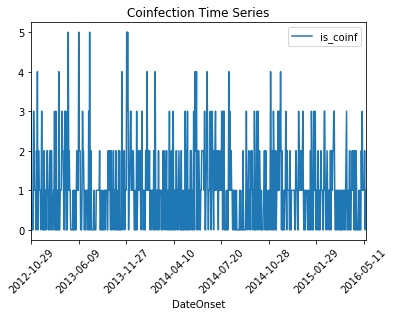

In [45]:
#plt.plot(x, y, ls="-", lw=2, label="plot figure")
import matplotlib.dates as mdates
date_fmt = mdates.DateFormatter('%y-%m-%d')
ax = time.plot.line(x='DateOnset', y='is_coinf')
ax.set_title('Coinfection Time Series')
plt.xticks(rotation=45)

## Whether/how coinfection impacts the disease severity?

As for this topic, I divide it into three parts: 

1. Coinfection number's impact on disease severity
2. Coinfection Type's impact on disease severity  : linear regression
3. Whether coinfections have impact on disease severity(Lenth of Stay,Temprature): Cluster 

For the first two parts with additional information : Very few patients died in our dataset. Therefore, I decide to use `Length of stay` to describe disease severity. In other words, more severe patients stayed in hospital longer time. 

First part, directly use `is_coinf` feature as coinfection number to explore correlation between them. Try to find severity difference for various coinfection.

Second part, I will find all the coinfection type (eg.ABC).And find the correlation.

Third part, use cluster analysis to calculate different coinfection influence

Additional information : Very few patients died in our dataset. Therefore, I decide to use Length of stay to describe disease severity. In other words, more severe patients stayed in hospital longer time. 

### Coinfection number's impact on disease severity(Length of Stay) & (Temperature)

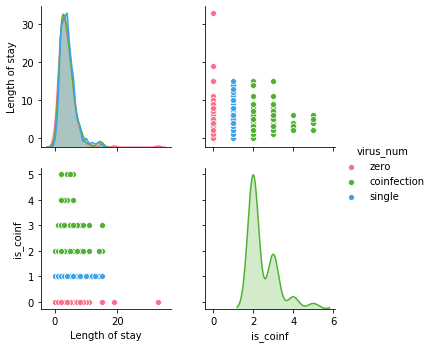

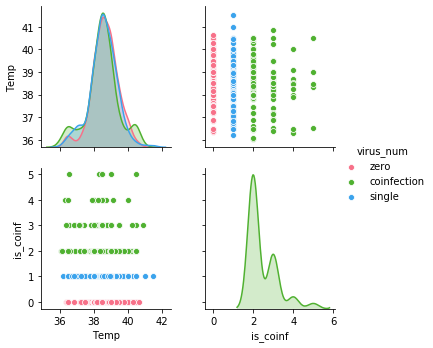

In [46]:
coinf_1=virus45.loc[:,['Length of stay','is_coinf','Temp']]
coinf_2=virus45.loc[:,'Alphapapillomavirus':'Unclassified virus']
coinf=pd.concat([coinf_1, coinf_2], axis=1)
np.seterr(invalid='ignore')

vm=[]
for i in coinf.is_coinf.index:
    if coinf.is_coinf[i]==0:
        vm.append('zero')
    else:
        if coinf.is_coinf[i]==1:
            vm.append('single')
        else:
            vm.append('coinfection')
coinf['virus_num']=vm

coinf.groupby('virus_num')['Length of stay'].mean()
sns.pairplot(coinf.loc[:,['Length of stay','virus_num','is_coinf']],hue='virus_num',palette="husl")
sns.pairplot(coinf.loc[:,['Temp','virus_num','is_coinf']],hue='virus_num',palette="husl")


### Linear Regression mdoel: Coinfection Type's impact on disease severity (Length of Stay) & (Temperature)
$$importance-xi=\frac{|\beta_i|}{\sum_j{|\beta_j|}}$$

In [47]:
virus45.loc[:,['Length of stay','is_coinf','Temp']].groupby('is_coinf').mean()

,Length of stay,Temp
is_coinf,,
0,4.003745,38.670117
1,4.272000,38.575955
2,4.235772,38.580698
3,4.280000,38.473350
4,3.090909,38.212492
5,3.800000,38.566473


In [48]:
coinf_1=virus45.loc[:,['Length of stay','is_coinf','Temp']]
coinf_2=virus45.loc[:,'Alphapapillomavirus':'Unclassified virus']
coinf_2=abs(coinf_2-2)
coinf=pd.concat([coinf_1, coinf_2], axis=1)
vm=[]
for i in coinf.is_coinf.index:
    if coinf.is_coinf[i]==0:
        vm.append('zero')
    else:
        if coinf.is_coinf[i]==1:
            vm.append('single')
        else:
            vm.append('coinfection')
coinf['virus_num']=vm

In [49]:
print(coinf.loc[coinf.Rotavirus==1].groupby('virus_num')['Length of stay'].mean())
common_1=coinf.loc[coinf['Rotavirus']==1]
common_1=common_1.loc[common_1['virus_num']=='coinfection'].drop(columns='Temp')

print(coinf.loc[coinf.Norovirus==1].groupby('virus_num')['Length of stay'].mean())
common_2=coinf.loc[coinf['Norovirus']==1]
common_2=common_2.loc[common_2['virus_num']=='coinfection'].drop(columns='Temp')

print(coinf.loc[coinf. Sapovirus==1].groupby('virus_num')['Length of stay'].mean())
common_3=coinf.loc[coinf['Sapovirus']==1]
common_3=common_3.loc[common_3['virus_num']=='coinfection'].drop(columns='Temp')

print(coinf.loc[coinf.Kobuvirus==1].groupby('virus_num')['Length of stay'].mean())
common_4=coinf.loc[coinf['Kobuvirus']==1]
common_4=common_4.loc[common_4['virus_num']=='coinfection'].drop(columns='Temp')

print(coinf.loc[coinf.Mastadenovirus==1].groupby('virus_num')['Length of stay'].mean())
common_5=coinf.loc[coinf['Mastadenovirus']==1]
common_5=common_5.loc[common_5['virus_num']=='coinfection'].drop(columns='Temp')


print(coinf.loc[coinf.Mamastrovirus==1].groupby('virus_num')['Length of stay'].mean())
common_6=coinf.loc[coinf['Mamastrovirus']==1]
common_6=common_6.loc[common_6['virus_num']=='coinfection'].drop(columns='Temp')

virus_num
coinfection    4.000000
single         4.264706
Name: Length of stay, dtype: float64
virus_num
coinfection    4.155172
single         4.000000
Name: Length of stay, dtype: float64
virus_num
coinfection    4.195122
single         5.200000
Name: Length of stay, dtype: float64
virus_num
coinfection    4
single         4
Name: Length of stay, dtype: int64
virus_num
coinfection    4.555556
single         5.125000
Name: Length of stay, dtype: float64
virus_num
coinfection    4.428571
single         3.125000
Name: Length of stay, dtype: float64


#### Linear Regression Model : 
Compared to Scaled linear regression, original linear regression model give better prediction with higher $R^2$

In [50]:
def coi1(common):
    
    x=(common.drop(columns=['Length of stay','virus_num']))
    y=common['Length of stay']

    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x) 
    x_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

    lm= LinearRegression().fit(x_scaled, y)
    y_pred=lm.predict(x_scaled)
    
    feature_importance = lm.coef_
    feature_importance = (feature_importance / abs(feature_importance).max())

    sorted_idx = np.argsort(abs(feature_importance))[-15:]
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(5,5))
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    featax.set_title('Other Viruses Coinfection Effect on Severity')

    plt.tight_layout()   
    plt.show()

    return get_lr_stats(x_scaled,y,lm)



In [51]:
def coi2(common):
    
    x=(common.drop(columns=['Length of stay','virus_num']))
    y=common['Length of stay']

    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x) 
    x_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)
    lm= LinearRegression().fit(x, y)
    y_pred=lm.predict(x)

    feature_importance = lm.coef_
    feature_importance = (feature_importance / abs(feature_importance).max())

    sorted_idx = np.argsort(abs(feature_importance))[-15:]
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(5,5))
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
    featax.set_xlabel('Relative Feature Importance')
    featax.set_title('Other Viruses Coinfection Effect on Severity')

    plt.tight_layout()   
    plt.show()

    return get_lr_stats(x,y,lm)


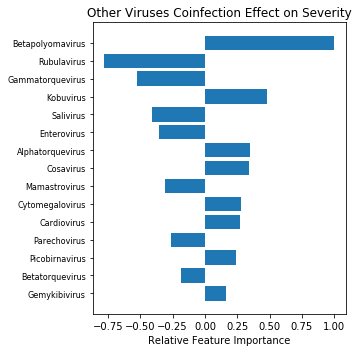

R_squard: 0.525331922739581


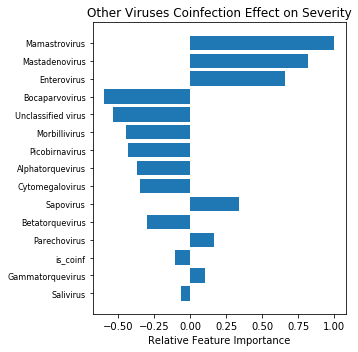

R_squard: 0.3219483842900084


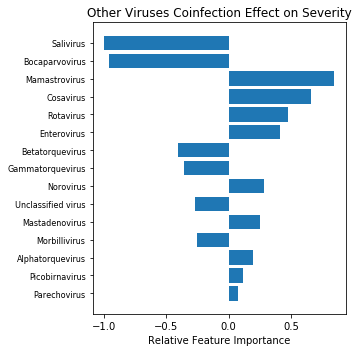

R_squard: 0.3510294018116677


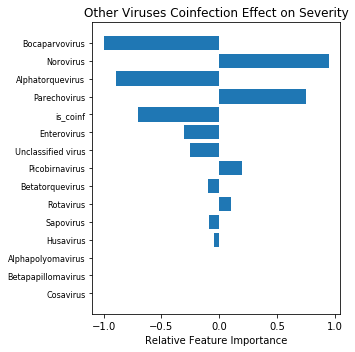

R_squard: 0.4407269554289127


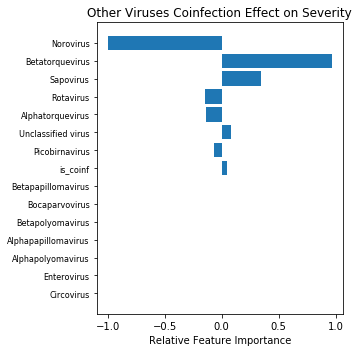

R_squard: 0.829


In [52]:
# length of stay
print('R_squard:',coi2(common_1))
print('R_squard:',coi2(common_2))
print('R_squard:',coi2(common_3))
print('R_squard:',coi2(common_5))
print('R_squard:',coi2(common_6))

 ##### Different Combinations Results: Mean value comparison

In [53]:
total=[]
t=[]
for j in coinf_2.index:
    name='NA'
    k=0
    for i in coinf_2.columns:
        if coinf_2.loc[j,i]==1:
            name=name+'+'+i
            k=k+1
    total.append(str(name))
    t.append(round(k))

coinf_2['type']=total
coinf_2['coinf_amount']=t
coinf_type=pd.concat([coinf_1, coinf_2], axis=1)
type_mean=pd.DataFrame(coinf_type.groupby('type')['Length of stay','Temp','coinf_amount'].mean())

In [54]:
type_mean[type_mean.index.str.contains('Rotavirus')].sort_values(by='coinf_amount')

,Length of stay,Temp,coinf_amount
type,,,
NA+Rotavirus,4.264706,38.713022,1.0
NA+Rotavirus+Unclassified virus,4.000000,38.000000,2.0
NA+Mastadenovirus+Rotavirus,4.000000,38.891312,2.0
NA+Mamastrovirus+Rotavirus,3.428571,38.775263,2.0
NA+Gammatorquevirus+Rotavirus,2.000000,38.881101,2.0
NA+Enterovirus+Rotavirus,4.000000,38.000000,2.0
NA+Rotavirus+Sapovirus,6.000000,38.200000,2.0
NA+Norovirus+Rotavirus,4.000000,39.256024,2.0
NA+Bocaparvovirus+Rotavirus,6.000000,38.567615,2.0


### Cluster : Whether coinfections have impact on disease severity(Lenth of Stay,Temprature) 

In [55]:
coinf_1=virus45.loc[:,['Length of stay','NumberDiarEpi','AbdominalPain','BloodStool','Temp']]
#coinf_1=virus45.loc[:,['Length of stay','is_coinf','Temp']]
coinf_2=virus45.loc[:,'Alphapapillomavirus':'Unclassified virus']
coinf=pd.concat([coinf_1, coinf_2], axis=1)
total=[]
t=[]
for j in coinf_2.index:
    name='NA'
    for i in coinf_2.columns:
        if coinf_2.loc[j,i]==1:
            name=name+'+'+i
    total.append(str(name))

coinf['type']=total
coinf_type=pd.concat([coinf_1, coinf_2], axis=1)


$$ S(C,m_1,m_2...m_k) = \sum\limits_{i=1}^{n}{||x_i-m_{c(i)}||^2}$$

$$ c(i)=argmin_j{||x_i-m_j||}, i\in{1,2...n}$$

And the cluster centroid for $C_k$:
$$m_k=\frac{1}{n_k}\sum\limits_{c(i)=k}{x_i}$$

$$s(i)=\frac{b(i)-a(i)}{max(a(i),b(i))}$$

$$a(i)=\frac{1}{n_{c(i)}-1}\sum\limits_{c(j)=c(i):j \neq i}{d(x_i,x_j)},b(i)=min_{k \neq c(i)}{\frac{1}{n_k}\sum\limits_{c(j)=k}}{d(x_i,x_j)}$$

In [56]:
coinf_cluster=coinf.loc[:,['Length of stay','Temp','type']]
coinf_cluster_1=coinf_cluster.loc[coinf_cluster.type.str.contains('Rotavirus')==True]
coinf_cluster_2=coinf_cluster.loc[coinf_cluster.type.str.contains('Sapovirus')==True]
coinf_cluster_3=coinf_cluster.loc[coinf_cluster.type.str.contains('Norovirus')==True]
coinf_cluster_4=coinf_cluster.loc[coinf_cluster.type.str.contains('Kobuvirus')==True]
coinf_cluster_5=coinf_cluster.loc[coinf_cluster.type.str.contains('Mastadenovirus')==True]
coinf_cluster_6=coinf_cluster.loc[coinf_cluster.type.str.contains('Mamastrovirus')==True]



print('Rotavirus Number of Types',len(np.unique(coinf_cluster_1['type'])))
print('Sapovirus Number of Types',len(np.unique(coinf_cluster_2['type'])))
print('Norovirus Number of Types',len(np.unique(coinf_cluster_3['type'])))
print('Kobuvirus Number of Types',len(np.unique(coinf_cluster_4['type'])))
print('Mastadenovirus Number of Types',len(np.unique(coinf_cluster_5['type'])))
print('Mamastrovirus Number of Types',len(np.unique(coinf_cluster_6['type'])))



Rotavirus Number of Types 30
Sapovirus Number of Types 25
Norovirus Number of Types 31
Kobuvirus Number of Types 5
Mastadenovirus Number of Types 19
Mamastrovirus Number of Types 8


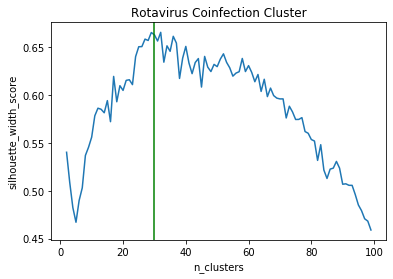

In [57]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_1.drop(columns='type')
y=coinf_cluster_1.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,100):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))

    #adjusted_rand_s.append( metrics.adjusted_rand_score(y, pre_y))
    #completeness_s.append( metrics.completeness_score(y, pre_y))
y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width_score')
plt.title('Rotavirus Coinfection Cluster')
plt.axvline(x=30,ls="-",c="green")
plt.show()


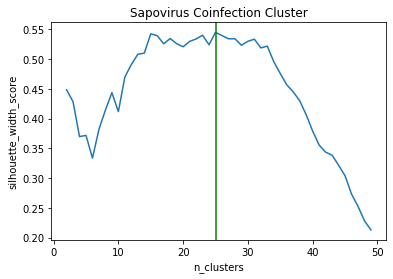

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_2.drop(columns='type')
y=coinf_cluster_2.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,50):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))

y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width_score')
plt.title('Sapovirus Coinfection Cluster')
plt.axvline(x=25,ls="-",c="green")
plt.show()


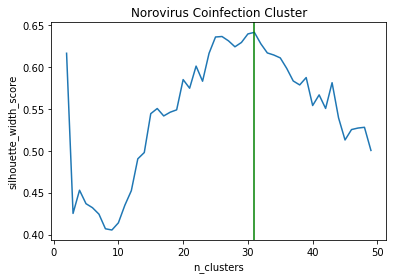

In [59]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_3.drop(columns='type')
y=coinf_cluster_3.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,50):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))
    


y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width_score')
plt.title('Norovirus Coinfection Cluster')
plt.axvline(x=31,ls="-",c="green")
plt.show()



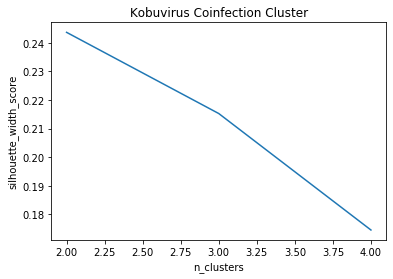

In [60]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_4.drop(columns='type')
y=coinf_cluster_4.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,5):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))
   

y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width_score')
plt.title('Kobuvirus Coinfection Cluster')
plt.show()



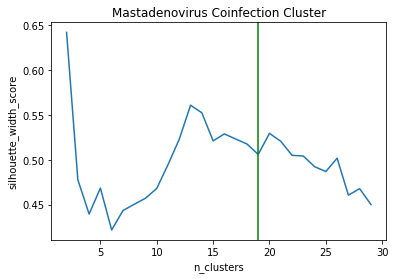

In [61]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_5.drop(columns='type')
y=coinf_cluster_5.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,30):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))


y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width_score')
plt.title('Mastadenovirus Coinfection Cluster')
plt.axvline(x=19,ls="-",c="green")
plt.show()




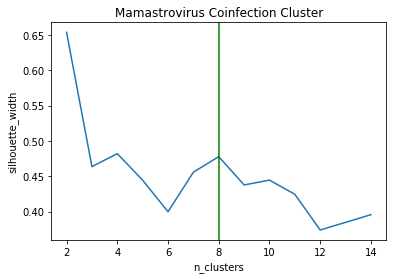

In [62]:
from sklearn.cluster import KMeans
from sklearn import metrics
x=coinf_cluster_6.drop(columns='type')
y=coinf_cluster_6.type
x=np.mat(x).A
y=y.values
adjusted_rand_s=[]
mutual_info_s =[]
adjusted_mutual_info_s=[]
homogeneity_s=[]
completeness_s=[]
silhouette_s=[]
cluster=[]
for i in range(2,15):
    n_clusters=i
    cluster.append(i)
    kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
    kmeans.fit(x)
    pre_y = kmeans.predict(x)
    inertias = kmeans.inertia_

    silhouette_s.append( metrics.silhouette_score(x, pre_y, metric='euclidean'))



y_lab=silhouette_s
x_lab=cluster
plt.plot(x_lab,y_lab)
plt.xlabel('n_clusters') 
plt.ylabel('silhouette_width')
plt.title('Mamastrovirus Coinfection Cluster')
plt.axvline(x=8,ls="-",c="green")
plt.show()